### Text Classification using Keras Hub - Easy Level

This notebook presents an easy-level example of text classification using a pretrained Keras model and the IMDB movie review dataset.  
It includes data loading, text preprocessing using a vectorizer, building and compiling a simple model, training, and visualizing performance.  



In [1]:
import tensorflow as tf
import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

### Load the IMDB reviews dataset  
Downloads a small text dataset for binary sentiment classification.  
The dataset includes pre-labeled positive and negative movie reviews.


In [2]:
dataset, dataset_info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)
data_train, data_test = dataset["train"].batch(128), dataset["test"].batch(128)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.S3Z63D_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.S3Z63D_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.S3Z63D_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


### Load a simple text model from Keras  
Loads a pretrained text model from Keras Applications for easy transfer learning.  
The base model provides feature extraction from raw text input.


In [4]:
text_vectorizer = keras.layers.TextVectorization(max_tokens=10000, output_mode="int", output_sequence_length=256)

In [5]:
# Prepare text vectorization
text_only_train = data_train.map(lambda x, y: x)
text_vectorizer.adapt(text_only_train)

### Build the complete model  
Combines the vectorizer, pretrained base, and classification head into a single model.  
The output is a binary classifier for positive vs. negative sentiment.


In [6]:
inputs = keras.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = keras.layers.Embedding(input_dim=10000, output_dim=16)(x)
x = keras.layers.GlobalAveragePooling1D()(x)
x = keras.layers.Dense(16, activation="relu")(x)
x = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, x)

In [7]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [8]:
# Display sample text from dataset
sample_text, sample_label = next(iter(data_train.take(1)))
for i in range(3):  # Show 3 text samples
    print(f"Review {i+1}: {sample_text[i].numpy().decode('utf-8')}")
    print(f"Sentiment: {'Positive' if sample_label[i].numpy() == 1 else 'Negative'}\n")

Review 1: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Sentiment: Negative

Review 2: I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film w

In [10]:
# Train the model
history = model.fit(data_train, validation_data=data_test, epochs=5)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.7435 - loss: 0.5942 - val_accuracy: 0.7773 - val_loss: 0.4736
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.8335 - loss: 0.4148 - val_accuracy: 0.8382 - val_loss: 0.3812
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8662 - loss: 0.3324 - val_accuracy: 0.8560 - val_loss: 0.3450
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8850 - loss: 0.2886 - val_accuracy: 0.8648 - val_loss: 0.3270
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.8981 - loss: 0.2598 - val_accuracy: 0.8683 - val_loss: 0.3179


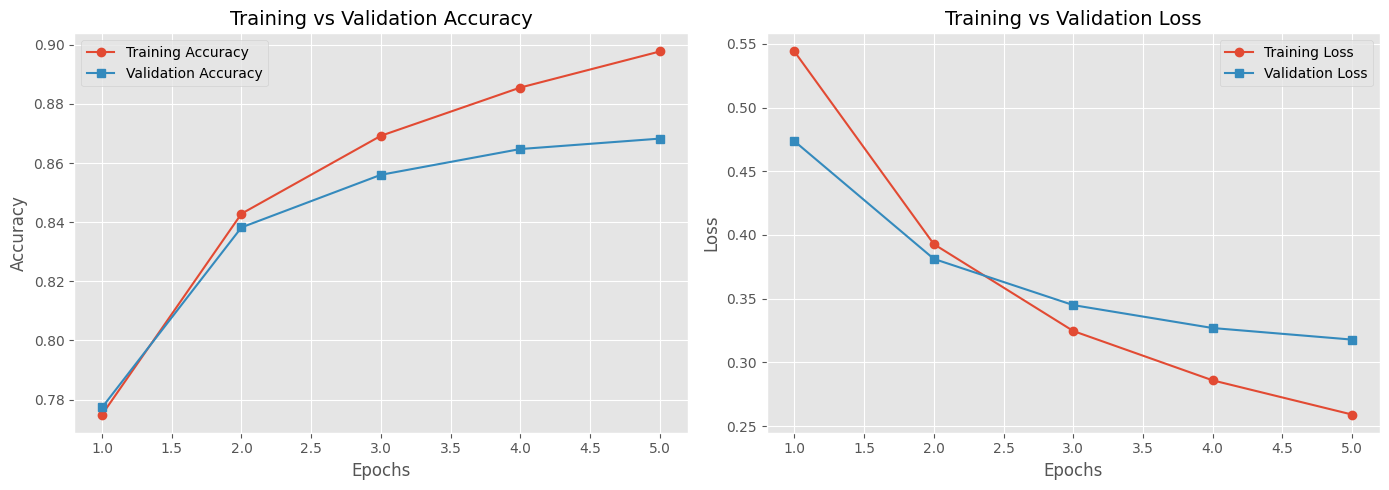

In [11]:
import matplotlib.pyplot as plt

def plot_text_classification_history(history):
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    epochs = range(1, len(acc) + 1)

    plt.style.use('ggplot')  # Clean built-in style
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy Plot
    axes[0].plot(epochs, acc, label='Training Accuracy', marker='o')
    if val_acc:
        axes[0].plot(epochs, val_acc, label='Validation Accuracy', marker='s')
    axes[0].set_title('Training vs Validation Accuracy', fontsize=14)
    axes[0].set_xlabel('Epochs', fontsize=12)
    axes[0].set_ylabel('Accuracy', fontsize=12)
    axes[0].legend()
    axes[0].grid(True)

    # Loss Plot
    axes[1].plot(epochs, loss, label='Training Loss', marker='o')
    if val_loss:
        axes[1].plot(epochs, val_loss, label='Validation Loss', marker='s')
    axes[1].set_title('Training vs Validation Loss', fontsize=14)
    axes[1].set_xlabel('Epochs', fontsize=12)
    axes[1].set_ylabel('Loss', fontsize=12)
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_text_classification_history(history)
